In [1]:
import pandas as pd
from collections import Counter
import wordcloud as wc
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('be grad stats.csv', parse_dates=['Timestamp'])
data.columns

Index(['Timestamp', 'What do you want to get out of a stats class?',
       'What sort of class are you interested in?',
       'What's your stats background?',
       'What content would you want to see in the class? [Foundations of probability]',
       'What content would you want to see in the class? [Basic data exploration]',
       'What content would you want to see in the class? [Basic statistical tests]',
       'What content would you want to see in the class? [Omics-style inference]',
       'What content would you want to see in the class? [Bayesian stats]',
       'What content would you want to see in the class? [Machine learning]',
       'What content would you want to see in the class? [Visualizations]',
       'What content would you want to see in the class? [Using R (or other programs)]',
       'What content would you want to see in the class? [Bring-your-own-data workshops]',
       'How much time do you want to give to this event?',
       'When could you come to

In [3]:
data.columns = ['timestamp', 'expectations', 'teacher', 'background', 'content:foundations', 'content:exploration',
               'content:tests', 'content:omics_inference', 'content:bayes', 'content:ml', 'content:visualizations',
               'content:programming', 'content:workshops', 'time_commitment', 'timing:IAP', 'timing:semester_day',
               'timing:semester_morining_evening', 'timing:semester_weekends', 'comments', 'email']

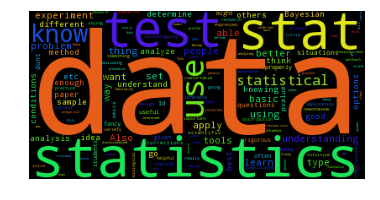

In [4]:
# Expectations from the class
data.expectations

def strip_punctuation(word):
    import string
    exclude = set(string.punctuation)
    exclude.add('\r')
    exclude.add('')

    word = ''.join(ch for ch in word if ch not in exclude)
    return word

def count_words(text):
    # assert isinstance(text, str)
    text = text.split(' ')
    cleaned_text = []
    for word in text:
        cleaned_text.append(strip_punctuation(word))
    return Counter(cleaned_text)

def word_cloud(data, column):
    all_counts = Counter()
    for row in data[column]:
        one_count = count_words(row)
        all_counts += one_count
    
    cleaned_counts = Counter()
    for word, count in all_counts.items():
        if len(word) > 4:
            cleaned_counts[word] = count
    return cleaned_counts

def plot_word_cloud(data, column):
    all_words = ''
    for row in data[column]:
        words = count_words(row).keys()
        for word in words:
            all_words += ' '
            all_words += word
    wordcloud = wc.WordCloud().generate(all_words)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# word_cloud(data, 'expectations').most_common(10)
plot_word_cloud(data, 'expectations')

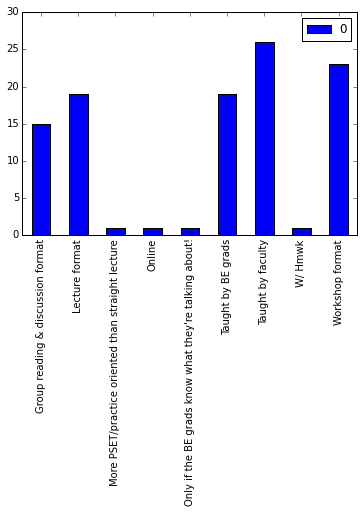

In [25]:
# Instructional options

def count_selected_options(data, column):

    selected_options = Counter()
    for row in data[column]:
        options = row.split(', ')
        for option in options:
            selected_options[option] += 1
    return selected_options

def plot_counts_of_selected_options(data, column):
    col_data = count_selected_options(data, column)
    pd.DataFrame().from_dict(col_data, orient='index').sort().plot(kind='bar')

# teacher_preferences = count_selected_options(data, 'teacher')
# pd.DataFrame().from_dict(teacher_preferences, orient='index').sort().plot(kind='bar')
# ax = plt.gca()

plot_counts_of_selected_options(data, 'teacher')

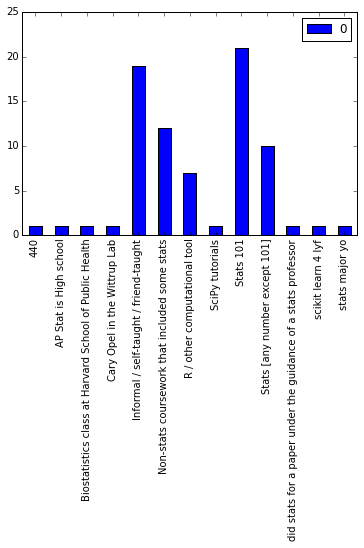

In [26]:
plot_counts_of_selected_options(data, 'background')

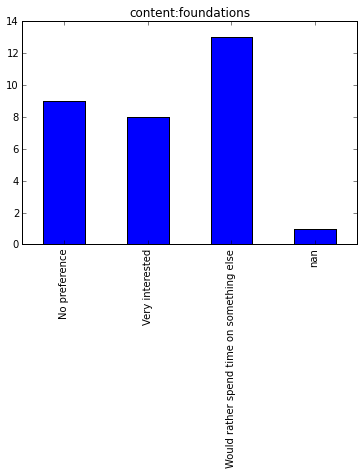

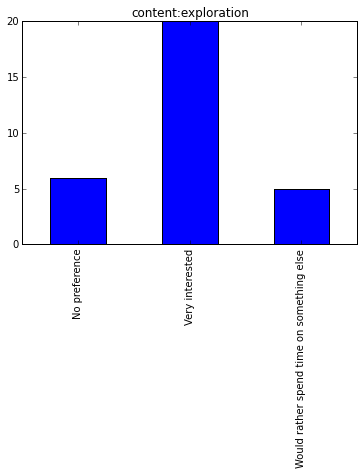

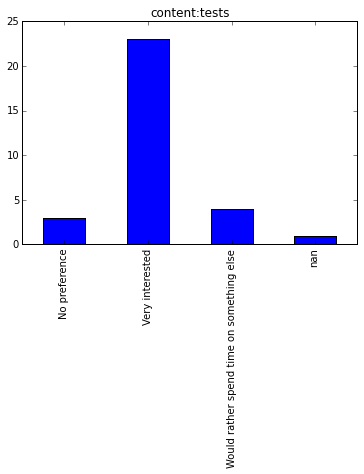

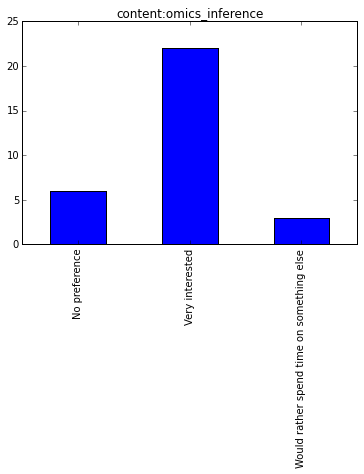

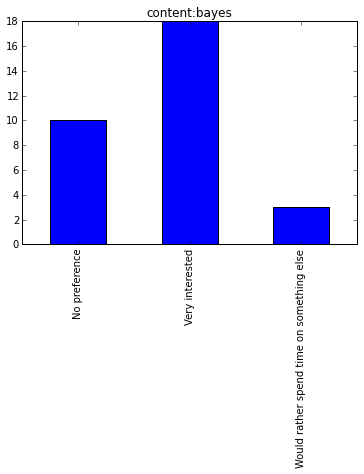

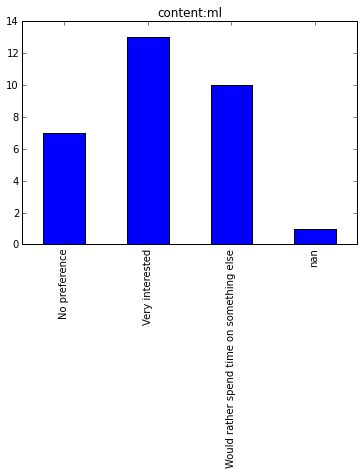

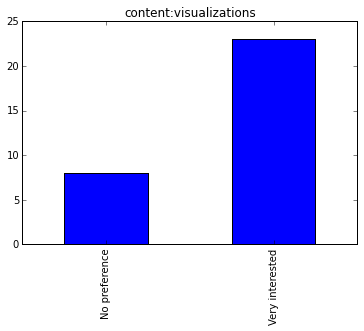

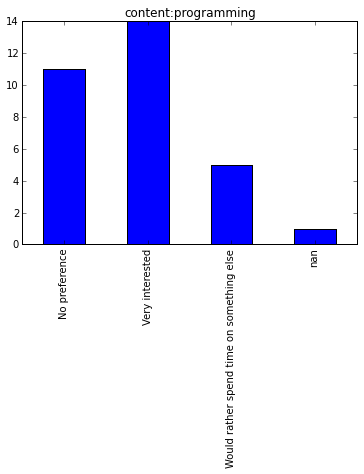

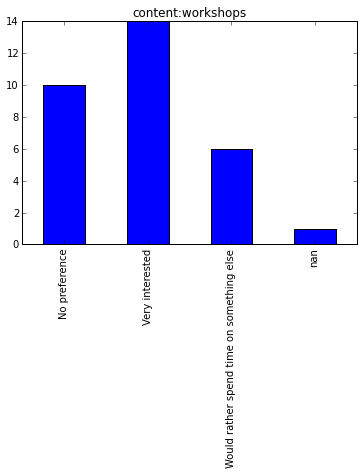

In [29]:
def plot_counts(counter):
    pd.DataFrame().from_dict(counter, orient='index').sort().plot(kind='bar')

# Questions on content
for col in data.columns:
    if 'content:' in col:
        plot_counts(Counter(data[col]))
        ax = plt.gca()
        ax.set_title(col)
        ax.legend().remove()

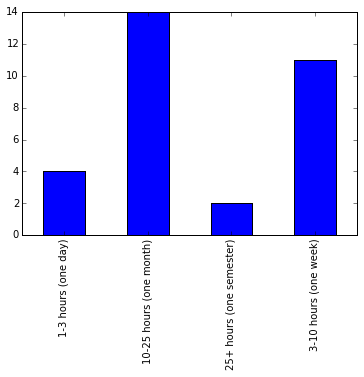

In [30]:
# Time commitment
plot_counts(Counter(data['time_commitment']))
ax = plt.gca()
ax.legend().remove()

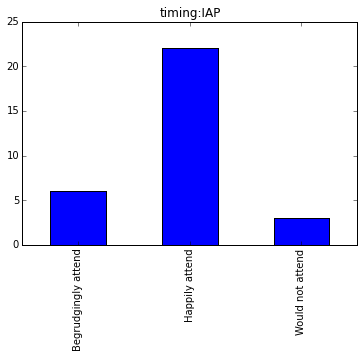

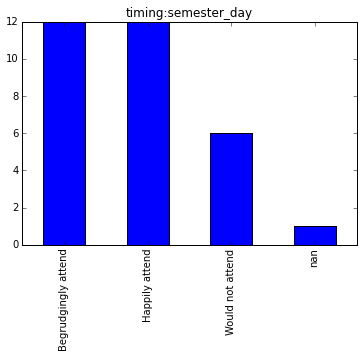

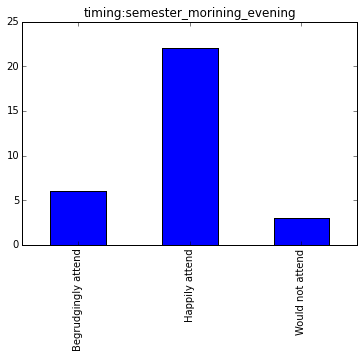

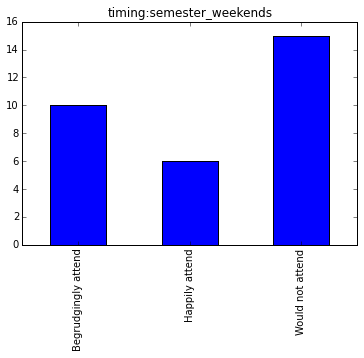

In [31]:
# Timing
for col in data.columns:
    if 'timing:' in col:
        plot_counts(Counter(data[col]))
        ax = plt.gca()
        ax.legend().remove()
        ax.set_title(col)